## 1. Foreword

Your problem statement will be the guiding force that will influence every question and decision making from this point onward. Before starting any of the exercises get that down.

It would be helpful to refresh the basics of statistical modelling and machine learnin before proceeding, here are the essential concepts that you should understand:

1. Exploratory Data Analysis (EDA):
    - Descriptive statistics (mean, median, variance, quantiles)
    - Understanding distributions and variability 

2. Data Pre-processing
    - Features & Target Transformation
    - Creating new features
    - Feature Selection

3. Regression Models: Linear Regression, Regularized Regression (Ridge, Lasso)
    - Interpreting coefficients, understanding R², MSE, MAE, RMSE

4. Classification Models: Logistic Regression, Decision Trees, Random Forests, SVMs, K-Nearest Neighbors
    - Interpreting probabilities, coefficients (log-odds), and feature importances

5. Evaluation Metrics:
    - For Regression: R², Mean Squared Error (MSE), Mean Absolute Error (MAE), Root Mean Squared Error (RMSE)
    - For Classification: Accuracy, Precision, Recall, F1 Score, ROC-AUC, and Confusion Matrix

6. Model Selection & Validation:
    - Train-test splits, cross-validation techniques
    - Overfitting vs. underfitting
    - Hyperparameter tuning (grid search, random search)

7. Model Interpretability & Explainability:
    - Interpreting model coefficients and feature importance
    - Visualization of decision trees (using plot_tree)
    - Tools like SHAP and LIME for local/global explanations



#### The entire Data Science process would look something like:

1. Exploration: Start with EDA to understand your data. Ask questions about distributions, correlations, and anomalies.
2. Modeling:Build models using core algorithms, evaluate with relevant metrics, and examine model outputs (coefficients, feature importances).
3. Evaluation:Compare metrics against baselines, inspect errors, and assess whether the model meets the problem requirements.
4. Iteration:Use insights from the evaluation to refine feature engineering, adjust preprocessing steps, or try different models.
5. Repeat: Go through this process again—exploration, modeling, evaluation—until you reach the desired balance between performance, interpretability, and practical applicability, based on your problem statement


## 2. Assignment Tasks

1) Define a problem statement
2) Perform EDA (if you are choosing a new dataset)
3) Use EDA Insights for feature selection and feature engineering
4) Create your first 3 models using the framework I provide
5) Evaluate the model and then attempt to improve it
6) Interpret Model results and outputs (coefficients, trees) and continue to add to your insights.
7) Explore 2 new models of your choice. Some suggestions are KNN, SVM for classification & Ridge, Lasso for regression but there are so many more and part of the fun of data science is researching new ways to do things.


Please note that the tasks above are guidelines and this is more of an art than a science. Your specific problem might require some specialized techniques and steps. I implore you to question every characteristic of your dataset and models you encounter and ask "how can I use this to give me insights?" and "what technique can I apply to this to make it useful?".

Good luck and feel free to reach out with any questions.

## 3. Resources
1. Concise explanation for popular Machine learning models : https://www.youtube.com/watch?v=E0Hmnixke2g
2. Fantastic sklearn algorithms cheat sheet : https://scikit-learn.org/stable/machine_learning_map.html
    - This sklearn tutorial by the sklearn team is amazing too : https://scikit-learn.org/1.4/tutorial/index.html
3. The Python Data Science handbook I linked last assignment has a great machine learning section that should help clear any basics.

These should help you get started but the best way to learn is start the process and when you encounter something you don't fully understand, look that up specifically and apply it.

## 4. Predictive Modelling (Your Assignment Should be Below)

For reference, below is working code roughly following the guidelines and using the same dataset from the last couple sessions.

## **1. Objective:**
A phishing website is a common social engineering method that mimics trustful uniform resource locators (URLs) and webpages. The objective of this project is to train machine learning models to predict phishing websites using extracted URL features.


# **2. Collecting the Data:**
For this project, we need a bunch of urls of type legitimate (0) and phishing (1).

The collection of phishing urls is rather easy because of the opensource service called PhishTank. This service provide a set of phishing URLs in multiple formats like csv, json etc. that gets updated hourly. To download the data: https://www.phishtank.com/developer_info.php

For the legitimate URLs, I found a source that has a collection of benign, spam, phishing, malware & defacement URLs. The source of the dataset is University of New Brunswick, https://www.unb.ca/cic/datasets/url-2016.html. The number of legitimate URLs in this collection are 35,300. The URL collection is downloaded & from that, *'Benign_list_big_final.csv'* is the file of our interest. This file is then uploaded to the Colab for the feature extraction.


## **2.1. Phishing URLs:**

The phishing URLs are collected from the PhishTank from the link provided. The csv file of phishing URLs is obtained by using wget command. After downlaoding the dataset, it is loaded into a DataFrame.

In [4]:
#importing required packages for this module
import pandas as pd
import requests

In [19]:
#Downloading the phishing URLs file
!wget2 -O DataFiles/online-valid.csv "http://data.phishtank.com/data/online-valid.csv"

HSTS in effect for data.phishtank.com:80


7[Files: 0  Bytes: 0  [0 B/s] Re]87[https://data.phishtank.com/dat]87DataFiles/online-val   0% [<=>                           ]       0          B/s87HTTP response 302  [https://data.phishtank.com/data/online-valid.csv]
87DataFiles/online-val   0% [ <=>                          ]       0          B/s87Adding URL: https://cdn.phishtank.com/datadumps/verified_online.csv?Expires=1741456587&Signature=bY-Ybk9pxi51Exoqu1nwOCjAKP~qeGcoXNXUoEPb-fuRbA29JDR84b7M7pu0Ez3MKc9gQ1mJc8fepsYMLkPL77OXkSKCdqiifWDNJh8zgWkgNboRBoMJv2R3pNUlJIiLe9sWTE3KGUqedDQR9fsYodPn1ACtW3mRCH-NHfEW4CkuZFlFvLjJQYQu-WixsaFD6Ir4XppyTGuUX4q5LuTZo0aaewS-g5IRkxfig19TSAqFZnYtPGWZGcjtWU9VNNrvjLFsGviutkhqzCGOQGESTBthXMncExHUjZgsjMt8ThHJAqxwf~DSy1Li7paBH2VwgtF2KpS9RQtz5APRsSzI2A__&Key-Pair-Id=APKAILB45UG3RB4CSOJA
87[Files: 0  Bytes: 0  [0 B/s] Re]87[https://cdn.phishtank.com/data]87DataFiles/online-val 100% [=============================>]   17.57K    --.-KB/s87HTTP ERRO

 The above command downlaods the file of phishing URLs, *online-valid.csv* and stores in the */DataFiles/* folder.

In [6]:
#loading the phishing URLs data to dataframe
data0 = pd.read_csv("DataFiles/online-valid.csv")
data0.head()

,phish_id,url,phish_detail_url,submission_time,verified,verification_time,online,target
0,8997132,https://webmail-authionos.com/fr/ionos-fr/login/,http://www.phishtank.com/phish_detail.php?phis...,2025-03-02T11:02:01+00:00,yes,2025-03-02T11:12:05+00:00,yes,Other
1,8997131,https://loggen.hover.benedwards.co.uk/manageho...,http://www.phishtank.com/phish_detail.php?phis...,2025-03-02T10:29:43+00:00,yes,2025-03-02T10:41:46+00:00,yes,Other
2,8997126,https://sp350083.sitebeat.crazydomains.com/,http://www.phishtank.com/phish_detail.php?phis...,2025-03-02T10:25:44+00:00,yes,2025-03-02T10:32:16+00:00,yes,Other
3,8997123,https://nrcrabbbe.wixsite.com/my-site-11sh2,http://www.phishtank.com/phish_detail.php?phis...,2025-03-02T10:23:15+00:00,yes,2025-03-02T10:32:16+00:00,yes,Other
4,8997122,https://my-site-103475-103976.weeblysite.com/,http://www.phishtank.com/phish_detail.php?phis...,2025-03-02T10:19:23+00:00,yes,2025-03-02T10:21:54+00:00,yes,Other


In [7]:
data0.shape

(63809, 8)

So, the data has thousands of phishing URLs. But the problem here is, this data gets updated hourly. Without getting into the risk of data imbalance, I am considering a margin value of 10,000 phishing URLs & 5000 legitimate URLs.

Thereby, picking up 5000 samples from the above dataframe randomly.

In [8]:
#Collecting 5,000 Phishing URLs randomly
phishurl = data0.sample(n = 5000, random_state = 12).copy()
phishurl = phishurl.reset_index(drop=True)
phishurl.head()

,phish_id,url,phish_detail_url,submission_time,verified,verification_time,online,target
0,7809052,https://bafybeigw5jlwvykqqwfwiz7bykja2imjyes2o...,http://www.phishtank.com/phish_detail.php?phis...,2022-10-03T11:54:54+00:00,yes,2022-10-03T12:06:10+00:00,yes,Other
1,8996646,https://ezdriverma.com-xaaawc.vip/,http://www.phishtank.com/phish_detail.php?phis...,2025-03-01T09:43:44+00:00,yes,2025-03-01T12:32:26+00:00,yes,Other
2,8794529,https://netzeromailaccount.weebly.com/,http://www.phishtank.com/phish_detail.php?phis...,2024-10-05T09:10:03+00:00,yes,2024-10-05T09:13:31+00:00,yes,Other
3,8721808,https://q-r.to/bfJmVL,http://www.phishtank.com/phish_detail.php?phis...,2024-08-19T19:26:49+00:00,yes,2024-08-19T19:33:22+00:00,yes,Other
4,8787848,https://l.ead.me/bfRE7s,http://www.phishtank.com/phish_detail.php?phis...,2024-09-30T09:14:54+00:00,yes,2024-09-30T09:22:42+00:00,yes,Other


In [12]:
phishurl.shape

(5000, 8)

As of now we collected 5000 phishing URLs. Now, we need to collect the legitimate URLs.

## **2.2. Legitimate URLs:**

From the uploaded *Benign_list_big_final.csv* file, the URLs are loaded into a dataframe.

In [9]:
#Loading legitimate files
data1 = pd.read_csv("DataFiles/benign_urls.csv")
data1.head()

,url,label
0,https://www.google.com,benign
1,https://www.youtube.com,benign
2,https://www.facebook.com,benign
3,https://www.baidu.com,benign
4,https://www.wikipedia.org,benign


As stated above, 5000 legitimate URLs are randomaly picked from the above dataframe.

In [10]:
#Collecting 5,000 Legitimate URLs randomly
legiurl = data1.sample(n = 5000, random_state = 12).copy()
legiurl = legiurl.reset_index(drop=True)
legiurl.head()

,url,label
0,https://www.metacafe.com/watch/yt-HXsvVQe34k8/...,benign
1,https://www.youtube.com/watch?v=ed6iq2Eylq4,benign
2,https://www.oliver-hardy.gonetoosoon.org/,benign
3,https://www.sportsillustrated.cnn.com/vault/to...,benign
4,https://www.city-data.com/forum/seattle-area/7...,benign


In [11]:
legiurl.shape

(5000, 2)

# **3. Feature Extraction:**

In this step, features are extracted from the URLs dataset.

The extracted features are categorized into


1.   Address Bar based Features
2.   Domain based Features
3.   HTML & Javascript based Features



In [13]:
## **3. Feature Extraction:**

# Below are your original features plus the new ones.

#---------------------------------------------------------
# Existing Imports
from urllib.parse import urlparse, urlencode
import ipaddress
import re
import time

# Additional Imports for new features
import math
import whois
from datetime import datetime

# We'll skip real n-gram code since it requires vectorizers,
# but I'll show a placeholder if you want to integrate it.
# from sklearn.feature_extraction.text import CountVectorizer

# If you plan to use Google Safe Browsing, you need an API key:
GOOGLE_SAFE_BROWSING_API_KEY = "YOUR_API_KEY"


#---------------------------------------------------------
# 3.1.1. Domain of the URL
def getDomain(url):
    domain = urlparse(url).netloc
    if re.match(r"^www\.", domain):
        domain = domain.replace("www.", "")
    return domain


# 3.1.2. IP Address in the URL
def havingIP(url):
    try:
        ipaddress.ip_address(url)
        ip = 1
    except:
        ip = 0
    return ip


# 3.1.3. "@" Symbol in URL
def haveAtSign(url):
    return 1 if "@" in url else 0


# 3.1.4. Length of URL
def getLength(url):
    return 1 if len(url) >= 54 else 0


# 3.1.5. Depth of URL
def getDepth(url):
    s = urlparse(url).path.split('/')
    depth = 0
    for j in range(len(s)):
        if len(s[j]) != 0:
            depth += 1
    return depth


# 3.1.6. Redirection "//" in URL
def redirection(url):
    pos = url.rfind('//')
    if pos > 6:
        return 1 if pos > 7 else 0
    return 0


# 3.1.7. "http/https" in Domain name
def httpDomain(url):
    domain = urlparse(url).netloc
    return 1 if 'https' in domain else 0


# 3.1.8. Using URL Shortening Services “TinyURL”
shortening_services = (
    r"bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|"
    r"yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|"
    r"short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|"
    r"doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|db\.tt|"
    r"qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|q\.gs|is\.gd|"
    r"po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|x\.co|"
    r"prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|"
    r"tr\.im|link\.zip\.net"
)


def tinyURL(url):
    match = re.search(shortening_services, url)
    return 1 if match else 0


# 3.1.9. Prefix or Suffix "-" in Domain
def prefixSuffix(url):
    return 1 if '-' in urlparse(url).netloc else 0


#---------------------------------------------------------
# 3.2. HTML and JavaScript based Features
def iframe(response):
    if response == "":
        return 1
    else:
        if re.findall(r"[<iframe>|<frameBorder>]", response.text):
            return 0
        else:
            return 1


def mouseOver(response):
    if response == "":
        return 1
    else:
        if re.findall(r"<script>.+onmouseover.+</script>", response.text):
            return 1
        else:
            return 0


def rightClick(response):
    if response == "":
        return 1
    else:
        if re.findall(r"event.button ?== ?2", response.text):
            return 0
        else:
            return 1


def forwarding(response):
    if response == "":
        return 1
    else:
        if len(response.history) <= 2:
            return 0
        else:
            return 1


#---------------------------------------------------------
# 3.2.1 Additional "web_traffic" or placeholders can stay as is or be appended:
def web_traffic(url):
    """Dummy or placeholder for domain rank check."""
    return 1  # Always returning 1 => 'risky'. Adjust if you prefer.


#---------------------------------------------------------
# 3.x. Lexical & Statistical Features
def calculate_entropy(s):
    """Calculate Shannon entropy of a string s."""
    if not s:
        return 0
    probs = [float(s.count(c)) / len(s) for c in dict.fromkeys(s)]
    entropy = -sum(p * math.log(p, 2) for p in probs)
    return entropy


def count_subdomains(domain):
    """Count how many subdomain tokens exist beyond the base domain."""
    if not domain:
        return 0
    tokens = domain.split('.')
    # If we assume domain TLD is 2 tokens like 'google.com',
    # subdomains = len(tokens) - 2 if > 0
    return max(0, len(tokens) - 2)


def count_digits(url):
    return sum(c.isdigit() for c in url)


def count_special_chars(url):
    # Count anything that's not alnum or typical punctuation (.:/?-_)
    return sum(1 for c in url if not c.isalnum() and c not in ".:/?-_")


def uppercase_ratio(url):
    if len(url) == 0:
        return 0
    return sum(1 for c in url if c.isupper()) / len(url)


#---------------------------------------------------------
# 3.x. WHOIS-based Feature
def get_domain_age(domain):
    """Calculate domain age in days, or -1 on error."""
    if not domain:
        return -1
    try:
        whois_info = whois.whois(domain)
        creation_date = whois_info.creation_date
        if isinstance(creation_date, list):
            creation_date = creation_date[0]
        age_days = (datetime.now() - creation_date).days
        return age_days
    except:
        return -1


#---------------------------------------------------------
# 3.x. Google Safe Browsing Reputation
def check_google_safe_browsing(url, api_key):
    """
    Placeholder for Google Safe Browsing. Requires a real API key from Google.
    Returns 0 if safe, 1 if threat found, or -1 if error.
    """
    if not api_key or api_key == "YOUR_API_KEY":
        # No actual check performed
        return -1

    api_url = "https://safebrowsing.googleapis.com/v4/threatMatches:find"
    payload = {
        "client": {
            "clientId": "yourcompanyname",
            "clientVersion": "1.0"
        },
        "threatInfo": {
            "threatTypes": ["MALWARE", "SOCIAL_ENGINEERING", "UNWANTED_SOFTWARE", "POTENTIALLY_HARMFUL_APPLICATION"],
            "platformTypes": ["ANY_PLATFORM"],
            "threatEntryTypes": ["URL"],
            "threatEntries": [{"url": url}]
        }
    }
    params = {"key": api_key}
    try:
        r = requests.post(api_url, params=params, json=payload, timeout=5)
        result = r.json()
        # If result is empty, no threat found
        return 1 if "matches" in result else 0
    except:
        return -1


#---------------------------------------------------------
# If you want to do n-gram vectorization, you'd do something like:
# vectorizer = CountVectorizer(analyzer='char', ngram_range=(3,3))
# vectorizer.fit(...) # but in practice, you'd incorporate that in a pipeline

#---------------------------------------------------------
# 4. MAIN featureExtraction function with new features:
def featureExtraction(url, label):
    start_time = time.time()
    features = []

    # 1) Domain
    domain = getDomain(url)
    features.append(domain)  # keep 'Domain' for reference

    # 2) Original address bar-based features
    features.append(havingIP(url))
    features.append(haveAtSign(url))
    features.append(getLength(url))
    features.append(getDepth(url))
    features.append(redirection(url))
    features.append(httpDomain(url))
    features.append(tinyURL(url))
    features.append(prefixSuffix(url))

    # ~Optional: add your "web_traffic" if you want:
    # features.append(web_traffic(url))  # or skip if not used in training

    address_bar_time = time.time()
    print(f"[LOG] Address bar features extracted in {address_bar_time - start_time:.2f} sec")

    # 3) Attempt HTTP request
    try:
        response = requests.get(url, timeout=3)
    except:
        response = ""

    response_time = time.time()
    print(f"[LOG] HTTP request in {response_time - address_bar_time:.2f} sec")

    # 4) HTML & JS-based features
    features.append(iframe(response))
    features.append(mouseOver(response))
    features.append(rightClick(response))
    features.append(forwarding(response))

    script_time = time.time()
    print(f"[LOG] HTML/JS features in {script_time - response_time:.2f} sec")

    # 5) New Lexical & Statistical features
    features.append(calculate_entropy(url))  # Entropy of entire URL
    features.append(calculate_entropy(domain))  # Entropy of domain only
    features.append(count_subdomains(domain))
    features.append(count_digits(url))
    features.append(count_special_chars(url))
    features.append(uppercase_ratio(url))

    # 6) WHOIS-based domain age
    domain_age = get_domain_age(domain)
    features.append(domain_age)

    # 7) Google Safe Browsing check
    safe_check = check_google_safe_browsing(url, GOOGLE_SAFE_BROWSING_API_KEY)
    features.append(safe_check)

    # Finally, the label
    features.append(label)

    total_time = time.time()
    print(f"[LOG] Total time for URL {url}: {total_time - start_time:.2f} sec\n")

    return features


### **3.1. Address Bar Based Features:**

Many features can be extracted that can be consided as address bar base features. Out of them, below mentioned were considered for this project.


*   Domain of URL
*   IP Address in URL
*   "@" Symbol in URL
*   Length of URL
*   Depth of URL
*   Redirection "//" in URL
*   "http/https" in Domain name
*   Using URL Shortening Services “TinyURL”
*   Prefix or Suffix "-" in Domain

Each of these features are explained and the coded below:

In [22]:
# importing required packages for this section
from urllib.parse import urlparse,urlencode
import ipaddress
import re

#### **3.1.1. Domain of the URL**
Here, we are just extracting the domain present in the URL. This feature doesn't have much significance in the training. May even be dropped while training the model.

In [23]:
# 1.Domain of the URL (Domain)
def getDomain(url):
  domain = urlparse(url).netloc
  if re.match(r"^www.",domain):
	       domain = domain.replace("www.","")
  return domain

#### **3.1.2. IP Address in the URL**

Checks for the presence of IP address in the URL. URLs may have IP address instead of domain name. If an IP address is used as an alternative of the domain name in the URL, we can be sure that someone is trying to steal personal information with this URL.

If the domain part of URL has IP address, the value assigned to this feature is 1 (phishing) or else 0 (legitimate).



In [24]:
# 2.Checks for IP address in URL (Have_IP)
def havingIP(url):
  try:
    ipaddress.ip_address(url)
    ip = 1
  except:
    ip = 0
  return ip


#### **3.1.3. "@" Symbol in URL**

Checks for the presence of '@' symbol in the URL. Using “@” symbol in the URL leads the browser to ignore everything preceding the “@” symbol and the real address often follows the “@” symbol.

If the URL has '@' symbol, the value assigned to this feature is 1 (phishing) or else 0 (legitimate).

In [25]:
# 3.Checks the presence of @ in URL (Have_At)
def haveAtSign(url):
  if "@" in url:
    at = 1
  else:
    at = 0
  return at

#### **3.1.4. Length of URL**

Computes the length of the URL. Phishers can use long URL to hide the doubtful part in the address bar. In this project, if the length of the URL is greater than or equal 54 characters then the URL classified as phishing otherwise legitimate.

If the length of URL >= 54 , the value assigned to this feature is 1 (phishing) or else 0 (legitimate).

In [26]:
# 4.Finding the length of URL and categorizing (URL_Length)
def getLength(url):
  if len(url) < 54:
    length = 0
  else:
    length = 1
  return length

#### **3.1.5. Depth of URL**

Computes the depth of the URL. This feature calculates the number of sub pages in the given url based on the '/'.

The value of feature is a numerical based on the URL.

In [27]:
# 5.Gives number of '/' in URL (URL_Depth)
def getDepth(url):
  s = urlparse(url).path.split('/')
  depth = 0
  for j in range(len(s)):
    if len(s[j]) != 0:
      depth = depth+1
  return depth

#### **3.1.6. Redirection "//" in URL**

Checks the presence of "//" in the URL. The existence of “//” within the URL path means that the user will be redirected to another website. The location of the “//” in URL is computed. We find that if the URL starts with “HTTP”, that means the “//” should appear in the sixth position. However, if the URL employs “HTTPS” then the “//” should appear in seventh position.

If the "//" is anywhere in the URL apart from after the protocal, thee value assigned to this feature is 1 (phishing) or else 0 (legitimate).

In [28]:
# 6.Checking for redirection '//' in the url (Redirection)
def redirection(url):
  pos = url.rfind('//')
  if pos > 6:
    if pos > 7:
      return 1
    else:
      return 0
  else:
    return 0

#### **3.1.7. "http/https" in Domain name**

Checks for the presence of "http/https" in the domain part of the URL. The phishers may add the “HTTPS” token to the domain part of a URL in order to trick users.

If the URL has "http/https" in the domain part, the value assigned to this feature is 1 (phishing) or else 0 (legitimate).

In [29]:
# 7.Existence of “HTTPS” Token in the Domain Part of the URL (https_Domain)
def httpDomain(url):
  domain = urlparse(url).netloc
  if 'https' in domain:
    return 1
  else:
    return 0

#### **3.1.8. Using URL Shortening Services “TinyURL”**

URL shortening is a method on the “World Wide Web” in which a URL may be made considerably smaller in length and still lead to the required webpage. This is accomplished by means of an “HTTP Redirect” on a domain name that is short, which links to the webpage that has a long URL.

If the URL is using Shortening Services, the value assigned to this feature is 1 (phishing) or else 0 (legitimate).

In [30]:
#listing shortening services
shortening_services = r"bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|" \
                      r"yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|" \
                      r"short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|" \
                      r"doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|db\.tt|" \
                      r"qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|q\.gs|is\.gd|" \
                      r"po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|x\.co|" \
                      r"prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|" \
                      r"tr\.im|link\.zip\.net"

In [31]:
# 8. Checking for Shortening Services in URL (Tiny_URL)
def tinyURL(url):
    match=re.search(shortening_services,url)
    if match:
        return 1
    else:
        return 0

#### **3.1.9. Prefix or Suffix "-" in Domain**

Checking the presence of '-' in the domain part of URL. The dash symbol is rarely used in legitimate URLs. Phishers tend to add prefixes or suffixes separated by (-) to the domain name so that users feel that they are dealing with a legitimate webpage.

If the URL has '-' symbol in the domain part of the URL, the value assigned to this feature is 1 (phishing) or else 0 (legitimate).

In [32]:
# 9.Checking for Prefix or Suffix Separated by (-) in the Domain (Prefix/Suffix)
def prefixSuffix(url):
    if '-' in urlparse(url).netloc:
        return 1            # phishing
    else:
        return 0            # legitimate

## **3.2. HTML and JavaScript based Features**

Many features can be extracted that come under this category. Out of them, below mentioned were considered for this project.

*   IFrame Redirection
*   Status Bar Customization
*   Disabling Right Click
*   Website Forwarding

Each of these features are explained and the coded below:

In [34]:
import re

def iframe(response):
    """
    Checks if the webpage contains <iframe> tags or frameBorder attributes.
    Returns 0 if found (suggesting a potentially legitimate behavior) 
    or 1 if not found (which may indicate suspicious behavior).
    """
    if response == "":
        return 1  # Treat missing response as suspicious
    # Search for the <iframe> tag or frameBorder attribute in the response text
    if re.search(r"<iframe|<frameBorder", response.text, re.IGNORECASE):
        return 0
    else:
        return 1

def mouse_over(response):
    """
    Detects if JavaScript changes the link on mouse hover.
    Returns 1 if an onmouseover event is found inside a <script> block, else 0.
    """
    if response == "":
        return 1  # No response; treat as suspicious
    # Look for onmouseover inside script tags (case insensitive)
    if re.search(r"<script.*onmouseover.*</script>", response.text, re.IGNORECASE | re.DOTALL):
        return 1
    else:
        return 0

def right_click(response):
    """
    Checks if the webpage disables right-clicking.
    Returns 0 if a right-click disabling event is found (suggesting a suspicious setup)
    and 1 if not found.
    """
    if response == "":
        return 1  # Missing response considered suspicious
    # Look for event.button==2 (common in right-click disabling code)
    if re.search(r"event\.button\s*==\s*2", response.text):
        return 0
    else:
        return 1

def forwarding(response):
    """
    Detects if the URL has too many HTTP redirects.
    Returns 0 if the number of redirects is 2 or fewer (typical for legitimate sites),
    or 1 if there are more than 2 redirects.
    """
    if response == "":
        return 1  # Missing response: flag as suspicious
    # If the number of redirects (history) is more than 2, flag it as suspicious
    if len(response.history) > 2:
        return 1
    else:
        return 0

### **3.2.1. IFrame Redirection**

IFrame is an HTML tag used to display an additional webpage into one that is currently shown. Phishers can make use of the “iframe” tag and make it invisible i.e. without frame borders. In this regard, phishers make use of the “frameBorder” attribute which causes the browser to render a visual delineation.

If the iframe is empty or repsonse is not found then, the value assigned to this feature is 1 (phishing) or else 0 (legitimate).

In [36]:
# 15. IFrame Redirection (iFrame)
def iframe(response):
  if response == "":
      return 1
  else:
      if re.findall(r"[<iframe>|<frameBorder>]", response.text):
          return 0
      else:
          return 1

### **3.2.2. Status Bar Customization**

Phishers may use JavaScript to show a fake URL in the status bar to users. To extract this feature, we must dig-out the webpage source code, particularly the “onMouseOver” event, and check if it makes any changes on the status bar

If the response is empty or onmouseover is found then, the value assigned to this feature is 1 (phishing) or else 0 (legitimate).

In [37]:
# 16.Checks the effect of mouse over on status bar (Mouse_Over)
def mouseOver(response):
  if response == "" :
    return 1
  else:
    if re.findall("<script>.+onmouseover.+</script>", response.text):
      return 1
    else:
      return 0

### **3.2.3. Disabling Right Click**

Phishers use JavaScript to disable the right-click function, so that users cannot view and save the webpage source code. This feature is treated exactly as “Using onMouseOver to hide the Link”. Nonetheless, for this feature, we will search for event “event.button==2” in the webpage source code and check if the right click is disabled.

If the response is empty or onmouseover is not found then, the value assigned to this feature is 1 (phishing) or else 0 (legitimate).




In [38]:
# 17.Checks the status of the right click attribute (Right_Click)
def rightClick(response):
  if response == "":
    return 1
  else:
    if re.findall(r"event.button ?== ?2", response.text):
      return 0
    else:
      return 1

### **3.2.4. Website Forwarding**
The fine line that distinguishes phishing websites from legitimate ones is how many times a website has been redirected. In our dataset, we find that legitimate websites have been redirected one time max. On the other hand, phishing websites containing this feature have been redirected at least 4 times.




In [40]:
# 18.Checks the number of forwardings (Web_Forwards)
def forwarding(response):
  if response == "":
    return 1
  else:
    if len(response.history) <= 2:
      return 0
    else:
      return 1

## **4. Computing URL Features**

Create a list and a function that calls the other functions and stores all the features of the URL in the list. We will extract the features of each URL and append to this list.

In [44]:
#Function to extract features
import time

# Function to extract features
def featureExtraction(url, label):
    start_time = time.time()

    features = []
    # Address bar based features
    features.append(getDomain(url))
    features.append(havingIP(url))
    features.append(haveAtSign(url))
    features.append(getLength(url))
    features.append(getDepth(url))
    features.append(redirection(url))
    features.append(httpDomain(url))
    features.append(tinyURL(url))
    features.append(prefixSuffix(url))

    address_bar_time = time.time()
    print(f"[LOG] Address bar features extracted in {address_bar_time - start_time:.2f} sec")

    # HTML & Javascript based features
    try:
        response = requests.get(url, timeout=3)  # Adding timeout to avoid hanging requests
    except:
        response = ""

    response_time = time.time()
    print(f"[LOG] HTTP request completed in {response_time - address_bar_time:.2f} sec")

    features.append(iframe(response))
    features.append(mouseOver(response))
    features.append(rightClick(response))
    features.append(forwarding(response))

    script_time = time.time()
    print(f"[LOG] HTML/JS features extracted in {script_time - response_time:.2f} sec")

    features.append(label)

    total_time = time.time()
    print(f"[LOG] Total time for URL {url}: {total_time - start_time:.2f} sec\n")

    return features


### **4.1. Legitimate URLs:**

Now, feature extraction is done on legitimate URLs.

In [45]:
legiurl.shape

(5000, 2)

In [46]:
#Extracting the feautres & storing them in a list
legi_features = []
label = 0

for i in range(0, 5000):
  correct_col = list(legiurl.columns)[0]  # Get the first column name
  url = legiurl[correct_col][i]  # Use the correct column
  legi_features.append(featureExtraction(url,label))
  print(f"Completed {i + 1} out of 5000")

[LOG] Address bar features extracted in 0.00 sec
[LOG] HTTP request completed in 0.07 sec
[LOG] HTML/JS features extracted in 0.00 sec
[LOG] Total time for URL https://www.metacafe.com/watch/yt-HXsvVQe34k8/hal_the_misinterpretive_porn_star/: 0.07 sec

Completed 1 out of 5000
[LOG] Address bar features extracted in 0.00 sec
[LOG] HTTP request completed in 0.23 sec
[LOG] HTML/JS features extracted in 0.02 sec
[LOG] Total time for URL https://www.youtube.com/watch?v=ed6iq2Eylq4: 0.24 sec

Completed 2 out of 5000
[LOG] Address bar features extracted in 0.00 sec
[LOG] HTTP request completed in 0.21 sec
[LOG] HTML/JS features extracted in 0.00 sec
[LOG] Total time for URL https://www.oliver-hardy.gonetoosoon.org/: 0.21 sec

Completed 3 out of 5000
[LOG] Address bar features extracted in 0.00 sec
[LOG] HTTP request completed in 0.03 sec
[LOG] HTML/JS features extracted in 0.00 sec
[LOG] Total time for URL https://www.sportsillustrated.cnn.com/vault/topic/article/Steve_Alford/1900-01-01/2100-1

In [48]:
#converting the list to dataframe
feature_names = ['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth','Redirection',
                      'https_Domain', 'TinyURL', 'Prefix/Suffix',
                 'iFrame', 'Mouse_Over','Right_Click', 'Web_Forwards', 'Label']

legitimate = pd.DataFrame(legi_features, columns= feature_names)
legitimate.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,metacafe.com,0,0,1,3,0,0,0,0,1,1,1,1,0
1,youtube.com,0,0,0,1,0,0,0,0,0,0,1,0,0
2,oliver-hardy.gonetoosoon.org,0,0,0,0,0,0,0,1,1,1,1,1,0
3,sportsillustrated.cnn.com,0,0,1,10,0,0,0,0,1,1,1,1,0
4,city-data.com,0,0,1,3,0,0,0,1,0,0,1,0,0


In [49]:
# Storing the extracted legitimate URLs fatures to csv file
legitimate.to_csv('legitimate.csv', index= False)

### **4.2. Phishing URLs:**

Now, feature extraction is performed on phishing URLs.

In [40]:
phishurl.shape

(5000, 8)

In [47]:
#Extracting the feautres & storing them in a list
phish_features = []
label = 1

for i in range(0, 5000):
  correct_col = list(phishurl.columns)[1]  # Get the first column name
  url = phishurl[correct_col][i]  # Use the correct column
  phish_features.append(featureExtraction(url,label))
  print(f"Completed {i + 1} out of 5000")

[LOG] Address bar features extracted in 0.00 sec
[LOG] HTTP request completed in 0.19 sec
[LOG] HTML/JS features extracted in 0.00 sec
[LOG] Total time for URL https://bafybeigw5jlwvykqqwfwiz7bykja2imjyes2ouyl57dd33vpydeip4efgy.ipfs.w3s.link/30093A.shtml: 0.19 sec

Completed 1 out of 5000
[LOG] Address bar features extracted in 0.00 sec
[LOG] HTTP request completed in 0.02 sec
[LOG] HTML/JS features extracted in 0.00 sec
[LOG] Total time for URL https://ezdriverma.com-xaaawc.vip/: 0.02 sec

Completed 2 out of 5000
[LOG] Address bar features extracted in 0.00 sec
[LOG] HTTP request completed in 0.02 sec
[LOG] HTML/JS features extracted in 0.00 sec
[LOG] Total time for URL https://netzeromailaccount.weebly.com/: 0.02 sec

Completed 3 out of 5000
[LOG] Address bar features extracted in 0.00 sec
[LOG] HTTP request completed in 0.43 sec
[LOG] HTML/JS features extracted in 0.00 sec
[LOG] Total time for URL https://q-r.to/bfJmVL: 0.43 sec

Completed 4 out of 5000
[LOG] Address bar features ex

In [50]:
#converting the list to dataframe
feature_names = ['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth','Redirection',
                      'https_Domain', 'TinyURL', 'Prefix/Suffix',
                 'iFrame', 'Mouse_Over','Right_Click', 'Web_Forwards', 'Label']

phishing = pd.DataFrame(phish_features, columns= feature_names)
phishing.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,bafybeigw5jlwvykqqwfwiz7bykja2imjyes2ouyl57dd3...,0,0,1,1,0,0,0,0,0,0,1,0,1
1,ezdriverma.com-xaaawc.vip,0,0,0,0,0,0,0,1,1,1,1,1,1
2,netzeromailaccount.weebly.com,0,0,0,0,0,0,0,0,1,1,1,1,1
3,q-r.to,0,0,0,1,0,0,0,1,0,0,1,0,1
4,l.ead.me,0,0,0,1,0,0,0,0,1,1,1,1,1


In [51]:
# Storing the extracted legitimate URLs fatures to csv file
phishing.to_csv('phishing.csv', index= False)

## **5. Final Dataset**

In the above section we formed two dataframes of legitimate & phishing URL features. Now, we will combine them to a single dataframe and export the data to csv file for the Machine Learning training done in other notebook.

In [52]:
#Concatenating the dataframes into one
urldata = pd.concat([legitimate, phishing]).reset_index(drop=True)
urldata.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,metacafe.com,0,0,1,3,0,0,0,0,1,1,1,1,0
1,youtube.com,0,0,0,1,0,0,0,0,0,0,1,0,0
2,oliver-hardy.gonetoosoon.org,0,0,0,0,0,0,0,1,1,1,1,1,0
3,sportsillustrated.cnn.com,0,0,1,10,0,0,0,0,1,1,1,1,0
4,city-data.com,0,0,1,3,0,0,0,1,0,0,1,0,0


In [53]:
urldata.tail()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
9995,pub-d02ee1b4a43248bfb0d7ce50b4a05762.r2.dev,0,0,1,1,0,0,0,1,0,0,1,0,1
9996,l.ead.me,0,0,0,1,0,0,0,0,1,1,1,1,1
9997,desktop-ledgree-live.webflow.io,0,0,0,0,0,0,0,1,1,1,1,1,1
9998,ezdrivema.com-qndngdlo.top,0,0,0,0,0,0,0,1,1,1,1,1,1
9999,almardoof.com,0,0,0,4,0,0,0,0,0,0,1,0,1


In [54]:
urldata.shape

(10000, 14)

In [55]:
# Storing the data in CSV file
urldata.to_csv('urldata.csv', index=False)

## **5.1 Visualizing the Data**

AttributeError: module 'matplotlib' has no attribute 'show'

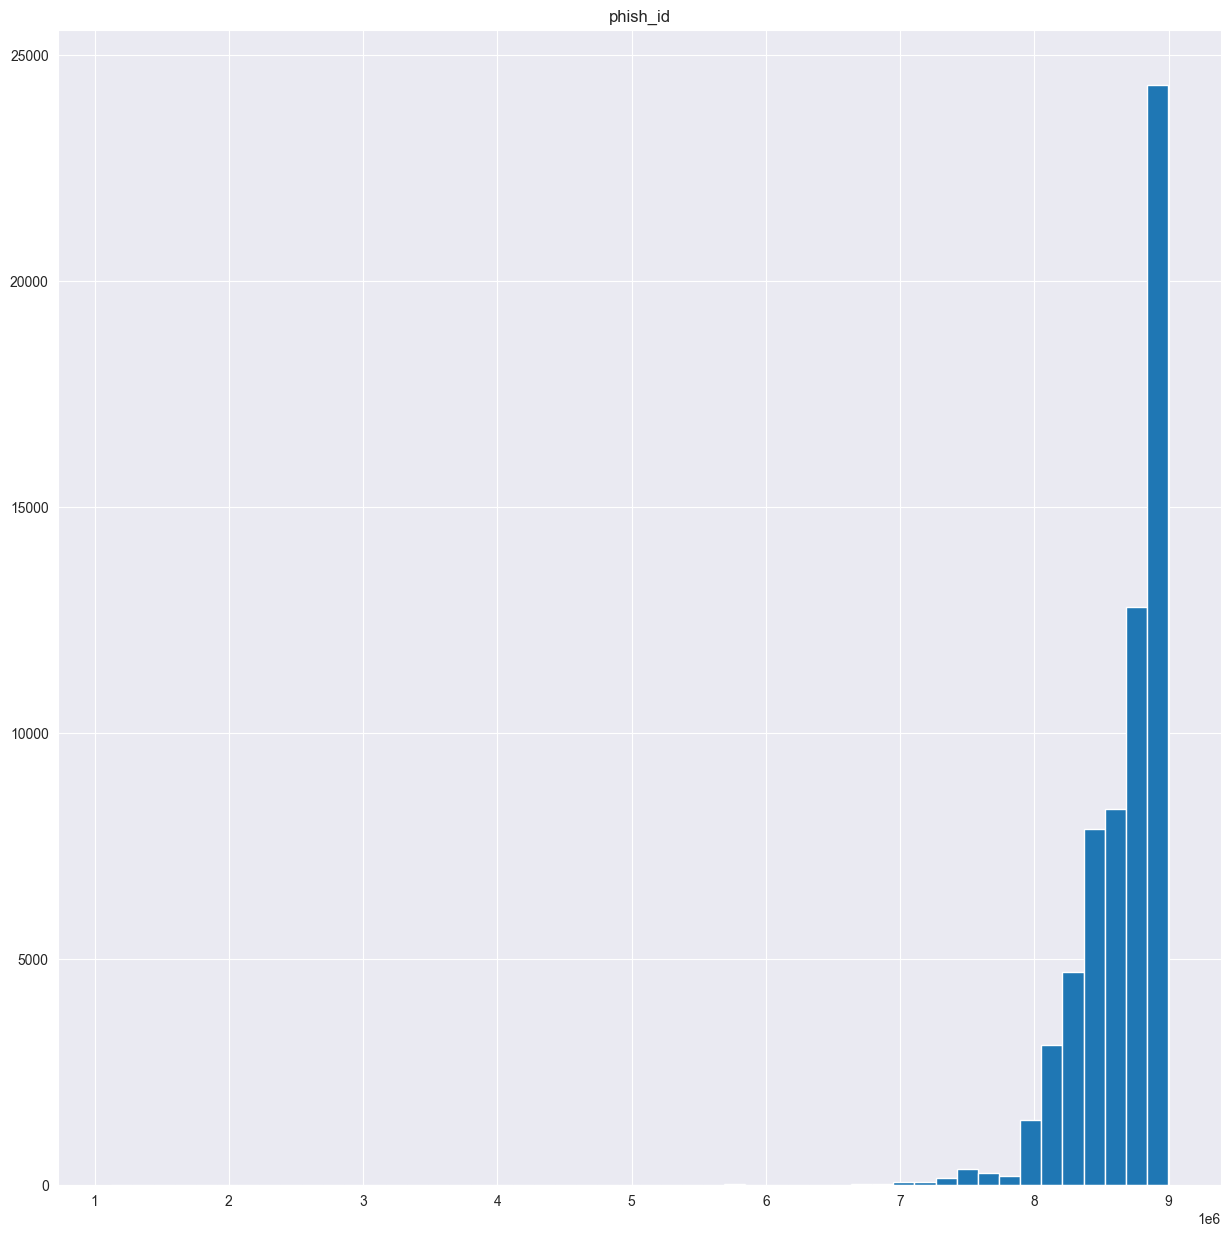

In [56]:
import matplotlib as plt
import seaborn as sns
#Plotting the data distribution
data0.hist(bins = 50,figsize = (15,15))
plt.show()

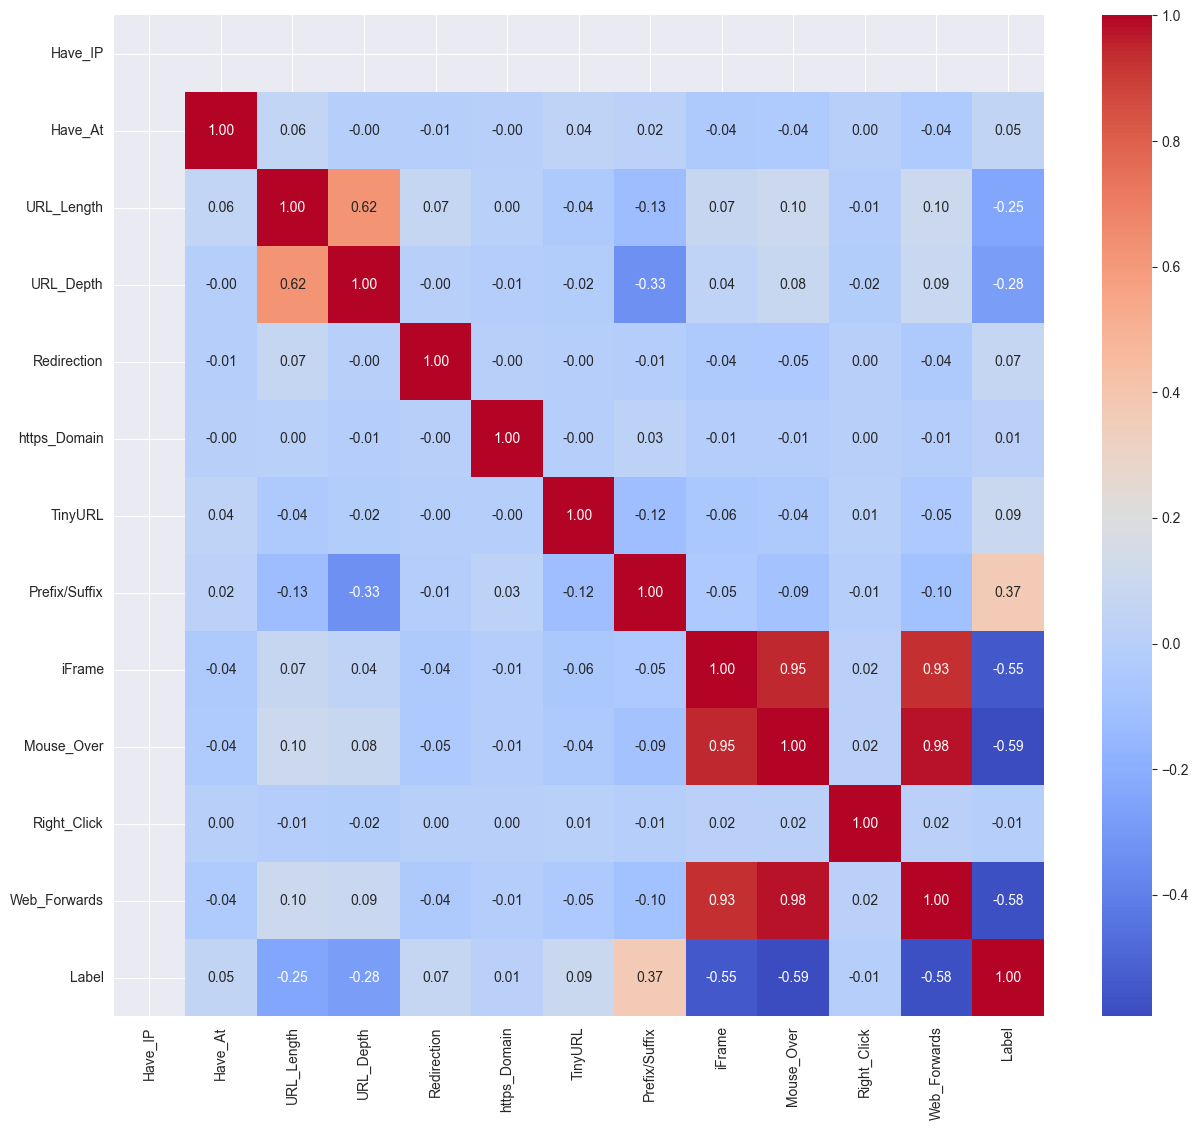

In [10]:
#Correlation heatmap
numeric_data = data0.select_dtypes(include=['number'])
plt.figure(figsize=(15, 13))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

## **5.2 Data Preprocessing & EDA**
Here, we clean the data by applying data preprocesssing techniques and transform the data to use it in the models.

In [11]:
data0.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.0,0.004700,0.365600,1.581900,0.005600,0.000200,0.086500,0.200900,0.459100,0.432100,0.999700,0.441800,0.500000
std,0.0,0.068399,0.481622,1.547557,0.074627,0.014141,0.281115,0.400693,0.498349,0.495393,0.017319,0.496626,0.500025
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.500000
75%,0.0,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,0.0,1.000000,1.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The above obtained result shows that the most of the data is made of 0's & 1's except 'Domain' & 'URL_Depth' columns. The Domain column doesnt have any significance to the machine learning model training. So dropping the *'Domain'* column from the dataset.

In [12]:
#Dropping the Domain column
data = data0.drop(['Domain'], axis = 1).copy()

This leaves us with 16 features & a target column. The *'URL_Depth'* maximum value is 20. According to my understanding, there is no necessity to change this column.

In [13]:
#checking the data for null or missing values
data.isnull().sum()

Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
iFrame           0
Mouse_Over       0
Right_Click      0
Web_Forwards     0
Label            0
dtype: int64

In the feature extraction file, the extracted features of legitmate & phishing url datasets are just concatenated without any shuffling. This resulted in top 5000 rows of legitimate url data & bottom 5000 of phishing url data.

To even out the distribution while splitting the data into training & testing sets, we need to shuffle it. This even evades the case of overfitting while model training.

In [14]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,1,0,0,0,0,1,1,1,1,1,1
1,0,0,0,2,0,0,0,0,1,1,1,1,0
2,0,0,0,0,0,0,0,0,1,1,1,1,1
3,0,0,1,1,0,0,0,1,1,1,1,1,0
4,0,0,0,0,0,0,0,1,0,0,1,0,1


From the above execution, it is clear that the data doesnot have any missing values.

By this, the data is throughly preprocessed & is ready for training.

## **5.3. Splitting the Data**

In [15]:
# Sepratating & assigning features and target columns to X & y
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape

((10000, 12), (10000,))

In [16]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((8000, 12), (2000, 12))

In [46]:
#importing packages
from sklearn.metrics import accuracy_score, precision_score
import numpy

# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []
prec_train = []
prec_test = []


# Function to store the results
def storeResults(model, acc_train_score, acc_test_score, prec_train_score, prec_test_score):
    ML_Model.append(model)
    acc_train.append(round(acc_train_score, 3))
    acc_test.append(round(acc_test_score, 3))
    prec_train.append(round(prec_train_score, 3))
    prec_test.append(round(prec_test_score, 3))

In [76]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split
# Sepratating & assigning features and target columns to X & y
X = urldata.drop(['Domain', 'Label'], axis=1)
X.shape, y.shape
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((8000, 12), (2000, 12))

In [63]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(X_train, y_train)  # Train the model

DecisionTreeClassifier(max_depth=5, random_state=42)

### **6. Decision Tree Classifier**
 Decision trees are widely used models for classification and regression tasks. Essentially, they learn a hierarchy of if/else questions, leading to a decision. Learning a decision tree means learning the sequence of if/else questions that gets us to the true answer most quickly.

In the machine learning setting, these questions are called tests (not to be confused with the test set, which is the data we use to test to see how generalizable our model is). To build a tree, the algorithm searches over all possible tests and finds the one that is most informative about the target variable.

In [64]:
# Decision Tree model
from sklearn.tree import DecisionTreeClassifier

# instantiate the model
tree = DecisionTreeClassifier(max_depth = 5)
# fit the model
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [65]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

**Performance Evaluation:**

In [66]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)
prec_train_tree = precision_score(y_train,y_train_tree)
prec_test_tree = precision_score(y_test,y_test_tree)


print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))
print("Decision Tree: Precision on training Data: {:.3f}".format(prec_train_tree))
print("Decision Tree: Precision on test Data: {:.3f}".format(prec_test_tree))


Decision Tree: Accuracy on training Data: 0.866
Decision Tree: Accuracy on test Data: 0.861
Decision Tree: Precision on training Data: 0.855
Decision Tree: Precision on test Data: 0.862


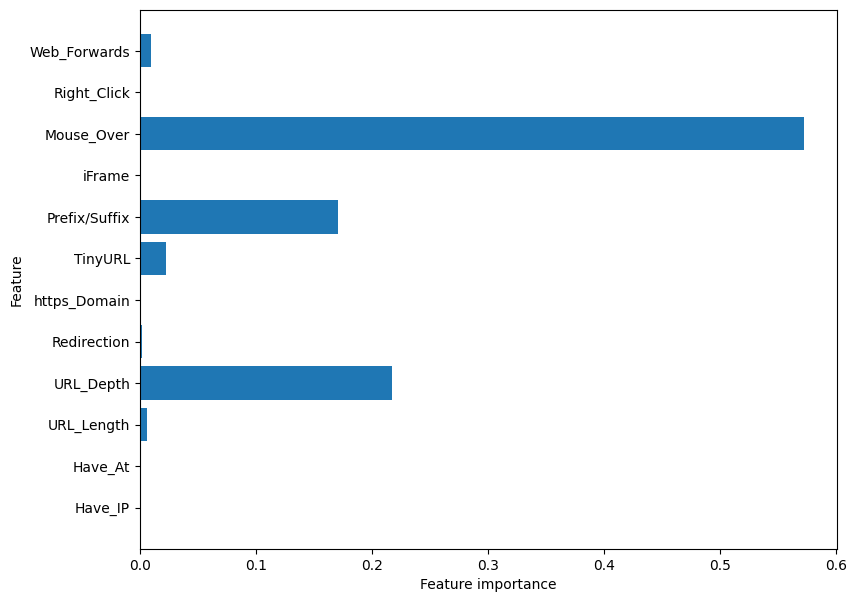

In [74]:
#checking the feature improtance in the model
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

**Storing the results:**

In [68]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Decision Tree', acc_train_tree, acc_test_tree, prec_test_tree, prec_train_tree)

#### Visualizing a Decision Tree

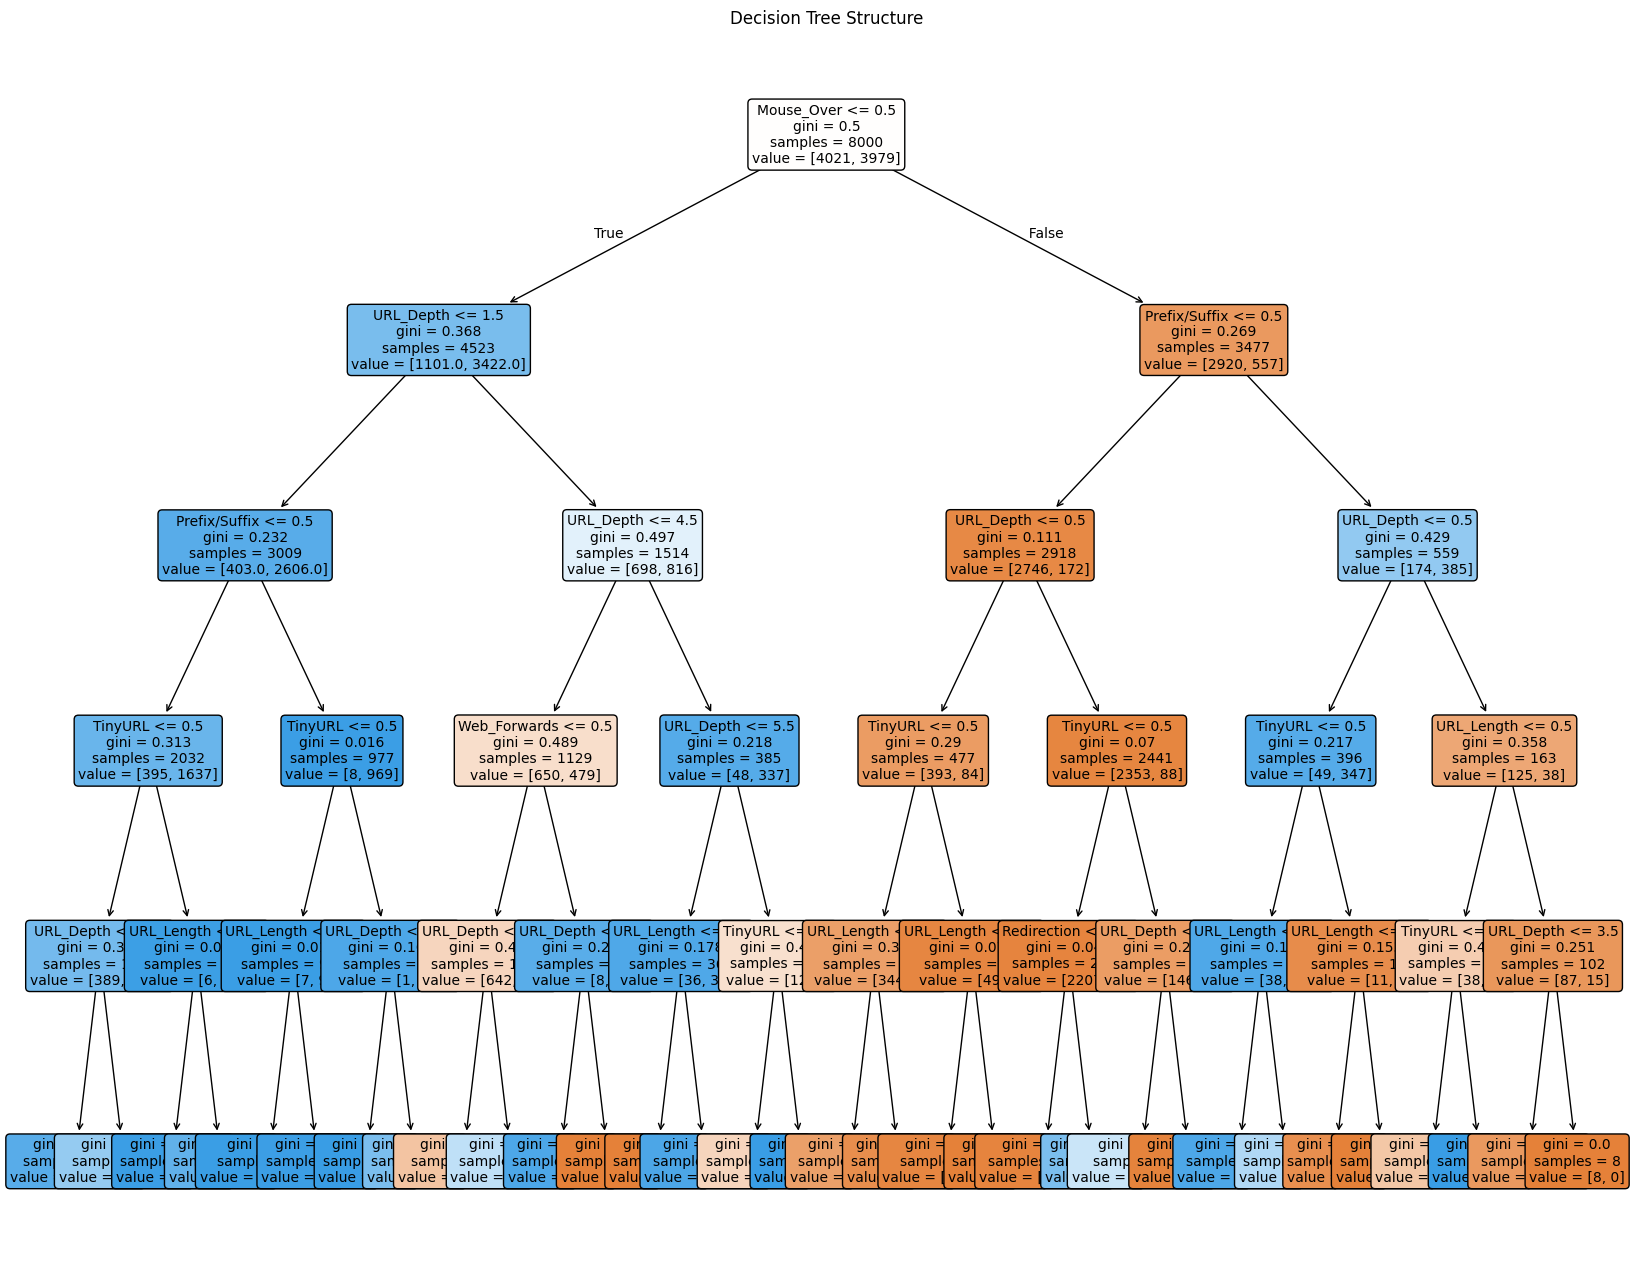

In [31]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 16))
plot_tree(tree, feature_names=X_train.columns, filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Structure")
plt.show()

I personally find this fascinating to look at. You can directly see how the tree will look at an observation and make a decision about which class it should put that in.

The trees get harder to look at the more you increase the max_depth hyperparameter, so its a balancing act between model performance and interpretability.

#### Hyperparameter Tuning 

We will use Grid Search CV that has cross-validation built in and will help us compare model performance accross different hyperparameters to choose the best one.

It would be really productive if you try to understand what the hyperparameters mean and how they will be helpful for your problem and make educated guesses about which ones to test with gridSearch. 

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Decision Tree
param_grid_tree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_tree = GridSearchCV(estimator=DecisionTreeClassifier(),
                                param_grid=param_grid_tree,
                                cv=5,
                                scoring='accuracy',
                                n_jobs=-1)
grid_search_tree.fit(X_train, y_train)

print("Best parameters for Decision Tree:", grid_search_tree.best_params_)
print("Best cross-validated accuracy:", grid_search_tree.best_score_)

Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best cross-validated accuracy: 0.8731249999999999


In [34]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for tuning
param_grid = {
    'criterion': ['gini', 'entropy'],  # Splitting criteria
    'max_depth': [None, 5, 10, 20],  # Max tree depth
    'min_samples_split': [2, 5, 10],  # Minimum samples to split
    'min_samples_leaf': [1, 2, 4],  # Minimum samples in leaf
    'max_features': [None, 'sqrt', 'log2']  # Feature selection criteria
}

# Instantiate the Decision Tree model
tree = DecisionTreeClassifier(random_state=42)

# Run Grid Search with 5-fold Cross Validation
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)  # Train with Grid Search

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [38]:
results_df = pd.DataFrame(grid_search.cv_results_)

# Display selected columns, e.g., parameters and mean test score
results_df[['params', 'mean_test_score', 'std_test_score']]

,params,mean_test_score,std_test_score
0,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.871750,0.007483
1,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.872125,0.007661
2,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.873000,0.007638
3,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.872125,0.007274
4,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.872125,0.007274
...,...,...,...
211,"{'criterion': 'entropy', 'max_depth': 20, 'max...",0.867000,0.005205
212,"{'criterion': 'entropy', 'max_depth': 20, 'max...",0.864625,0.015333
213,"{'criterion': 'entropy', 'max_depth': 20, 'max...",0.833250,0.009206
214,"{'criterion': 'entropy', 'max_depth': 20, 'max...",0.833250,0.009206


### **6.1. Random Forest Classifier**
Random forests for regression and classification are currently among the most widely used machine learning methods.A random forest is essentially a collection of decision trees, where each tree is slightly different from the others. The idea behind random forests is that each tree might do a relatively good job of predicting, but will likely overfit on part of the data.

If we build many trees, all of which work well and overfit in different ways, we can reduce the amount of overfitting by averaging their results. To build a random forest model, you need to decide on the number of trees to build (the n_estimators parameter of RandomForestRegressor or RandomForestClassifier). They are very powerful, often work well without heavy tuning of the parameters, and don’t require scaling of the data.









In [42]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=5)

# fit the model
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [43]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

**Performance Evaluation:**

In [44]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)
prec_train_forest = precision_score(y_train,y_train_forest)
prec_test_forest = precision_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))
print("Random forest: Precision on training Data: {:.3f}".format(prec_train_forest))
print("Random forest: Precision on test Data: {:.3f}".format(prec_test_forest))

Random forest: Accuracy on training Data: 0.865
Random forest: Accuracy on test Data: 0.862
Random forest: Precision on training Data: 0.826
Random forest: Precision on test Data: 0.832


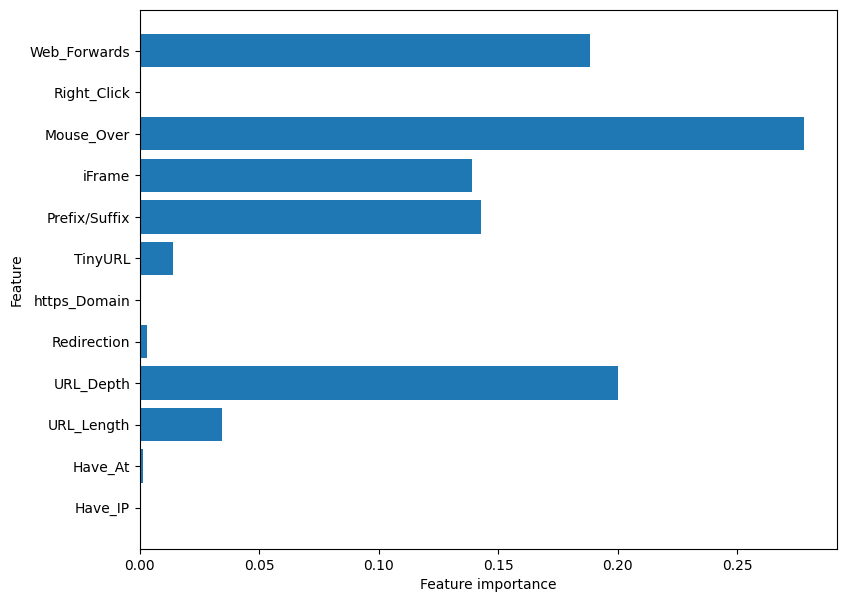

In [48]:
import numpy as np

plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

**Storing the results:**

In [49]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Random Forest', acc_train_forest, acc_test_forest, prec_train_forest, prec_test_forest)

### **6.2. Multilayer Perceptrons (MLPs): Deep Learning**
Multilayer perceptrons (MLPs) are also known as (vanilla) feed-forward neural networks, or sometimes just neural networks. Multilayer perceptrons can be applied for both classification and regression problems.

MLPs can be viewed as generalizations of linear models that perform multiple stages of processing to come to a decision.

In [51]:
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))

# fit the model
mlp.fit(X_train, y_train)
#predicting the target value from the model for the samples
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)



**Performance Evaluation:**

In [52]:
#computing the accuracy of the model performance
acc_train_mlp = accuracy_score(y_train,y_train_mlp)
acc_test_mlp = accuracy_score(y_test,y_test_mlp)
prec_train_mlp = precision_score(y_train,y_train_mlp)
prec_test_mlp = precision_score(y_test,y_test_mlp)

print("Multilayer Perceptrons: Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptrons: Accuracy on test Data: {:.3f}".format(acc_test_mlp))
print("Multilayer Perceptrons: Accuracy on training Data: {:.3f}".format(prec_train_mlp))
print("Multilayer Perceptrons: Accuracy on test Data: {:.3f}".format(prec_test_mlp))

Multilayer Perceptrons: Accuracy on training Data: 0.875
Multilayer Perceptrons: Accuracy on test Data: 0.870
Multilayer Perceptrons: Accuracy on training Data: 0.868
Multilayer Perceptrons: Accuracy on test Data: 0.878



**Storing the results:**


In [53]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Multilayer Perceptrons', acc_train_mlp, acc_test_mlp, prec_test_mlp, prec_train_mlp)

### **6.3. XGBoost Classifier**
XGBoost is one of the most popular machine learning algorithms these days. XGBoost stands for eXtreme Gradient Boosting. Regardless of the type of prediction task at hand; regression or classification. XGBoost is an implementation of gradient boosted decision trees designed for speed and performance.

In [54]:
#XGBoost Classification model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
#fit the model
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [55]:
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

**Performance Evaluation:**

In [56]:
#computing the accuracy of the model performance
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)
prec_train_xgb = precision_score(y_train,y_train_xgb)
prec_test_xgb = precision_score(y_test,y_test_xgb)


print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))
print("XGBoost: Precision on training Data: {:.3f}".format(prec_train_xgb))
print("XGBoost : Precision on test Data: {:.3f}".format(prec_test_xgb))

XGBoost: Accuracy on training Data: 0.877
XGBoost : Accuracy on test Data: 0.873
XGBoost: Precision on training Data: 0.871
XGBoost : Precision on test Data: 0.885


**Storing the results:**

In [57]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('XGBoost', acc_train_xgb, acc_test_xgb, prec_train_xgb, prec_test_xgb)

### **6.4. Support Vector Machines**

In machine learning, support-vector machines (SVMs, also support-vector networks) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier.

In [58]:
#Support vector machine model
from sklearn.svm import SVC

# instantiate the model
svm = SVC(kernel='linear', C=1.0, random_state=12)
#fit the model
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=12)

In [59]:
#predicting the target value from the model for the samples
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

**Performance Evaluation:**

In [60]:
#computing the accuracy of the model performance
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)
prec_train_svm = precision_score(y_train,y_train_svm)
prec_test_svm = precision_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))
print("SVM: Precision on training Data: {:.3f}".format(prec_train_svm))
print("SVM : Precision on test Data: {:.3f}".format(prec_test_svm))

SVM: Accuracy on training Data: 0.819
SVM : Accuracy on test Data: 0.816
SVM: Precision on training Data: 0.749
SVM : Precision on test Data: 0.755


**Storing the results:**

In [61]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('SVM', acc_train_svm, acc_test_svm, prec_train_svm, prec_test_svm)

## **8. Comparision of Models**
To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.

In [71]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test,
    'Train Precision': prec_train,
    'Test Precision': prec_test})
results

,ML Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision
0,Random Forest,0.865,0.862,0.826,0.832
1,Multilayer Perceptrons,0.875,0.870,0.878,0.868
2,XGBoost,0.877,0.873,0.871,0.885
3,SVM,0.819,0.816,0.749,0.755
4,Decision Tree,0.866,0.861,0.862,0.855


In [72]:
#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy', 'Test Precision', 'Train Accuracy', 'Train Precision'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision
2,XGBoost,0.877,0.873,0.871,0.885
1,Multilayer Perceptrons,0.875,0.870,0.878,0.868
0,Random Forest,0.865,0.862,0.826,0.832
4,Decision Tree,0.866,0.861,0.862,0.855
3,SVM,0.819,0.816,0.749,0.755


**From the above comparison, we see that XGBoost works best with this dataset.**